In [1]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn import linear_model, preprocessing 
import warnings

In [2]:
engagements = pd.read_csv('/Users/danielle.arneson/Desktop/stages.csv')

In [3]:
engagements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19555 entries, 0 to 19554
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Goal Record ID                        19554 non-null  object 
 1   Weekly Coaching Engagement Unique ID  19549 non-null  object 
 2   Overall Goal Status                   19549 non-null  object 
 3   Date of Engagement                    19549 non-null  object 
 4   Engagement Type                       19549 non-null  object 
 5   Discontinued Coaching                 1909 non-null   object 
 6   Program Satisfaction Calculated       10716 non-null  float64
 7   Stage_of_change                       17046 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.2+ MB


In [4]:
engagements.head(50)

,Goal Record ID,Weekly Coaching Engagement Unique ID,Overall Goal Status,Date of Engagement,Engagement Type,Discontinued Coaching,Program Satisfaction Calculated,Stage_of_change
0,20201209-2002788,E-20210104-5435001,Complete,1/4/21,Missed Appointment/ Left VM,NaN,NaN,NaN
1,20201007-1973053,E-20210104-5435011,Complete,1/4/21,1:1 Telephonic,NaN,5.0,NaN
2,20210104-2007157,E-20210104-5435019,Complete,1/4/21,1:1 Telephonic,NaN,5.0,NaN
3,20201104-1990369,E-20210104-5435042,Complete,1/4/21,1:1 Telephonic,NaN,5.0,"5- Somewhat committed, has action steps that t..."
4,20201228-2005493,E-20210104-5435045,Complete,1/4/21,1:1 Telephonic,NaN,5.0,"5- Somewhat committed, has action steps that t..."
5,20201002-1970912,E-20210104-5435048,Dismissed,1/4/21,1:1 Telephonic,NaN,NaN,"3- Thinking about committing, sees some value ..."
6,20201218-2004706,E-20210104-5435193,Complete,1/4/21,1:1 Telephonic,NaN,5.0,7- Committed and taking action
7,20201231-2006219,E-20210104-5435059,Dismissed,1/4/21,Rescheduled Appointment,NaN,NaN,NaN
8,20201229-2005809,E-20210104-5435103,Dismissed,1/4/21,Rescheduled Appointment,NaN,NaN,NaN
9,20200713-1919459,E-20210104-5435105,Complete,1/4/21,1:1 Telephonic,NaN,5.0,"10- Committed +, understands action steps and ..."


In [5]:
engagements = engagements[engagements['Stage_of_change'].notna()] #removal of all engagments without a stage of change 

In [6]:
engagements.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17046 entries, 3 to 19548
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Goal Record ID                        17046 non-null  object 
 1   Weekly Coaching Engagement Unique ID  17046 non-null  object 
 2   Overall Goal Status                   17046 non-null  object 
 3   Date of Engagement                    17046 non-null  object 
 4   Engagement Type                       17046 non-null  object 
 5   Discontinued Coaching                 1597 non-null   object 
 6   Program Satisfaction Calculated       10363 non-null  float64
 7   Stage_of_change                       17046 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.2+ MB


In [7]:
engagements['Stage_of_change'].value_counts()

7- Committed and taking action                                                                   7203
5- Somewhat committed, has action steps that they are ready to take                              4503
Missed/Rescheduled                                                                               2968
10- Committed +, understands action steps and has already completed said actions for sometime    1131
3- Thinking about committing, sees some value in making some changes                             1095
0- Not committed at all, does not plan on making a commitment                                     145
Committed and taking action                                                                         1
Name: Stage_of_change, dtype: int64

In [8]:
goals = engagements.groupby('Goal Record ID').agg({'Program Satisfaction Calculated': ['mean'],'Weekly Coaching Engagement Unique ID': 'count'}).reset_index()

In [9]:
goals.head(50)

,Goal Record ID,Program Satisfaction Calculated,Weekly Coaching Engagement Unique ID
,,mean,count
0,20191008-1664911,4.500000,2
1,20191031-1683829,NaN,5
2,20191105-1685954,NaN,1
3,20191209-1697849,NaN,1
4,20200128-1758561,5.000000,1
5,20200203-1770187,5.000000,4
6,20200214-1790234,4.500000,6
7,20200326-1849269,5.000000,6
8,20200505-1881822,NaN,1


In [48]:
goals['Weekly Coaching Engagement Unique ID'].describe() 

,count
count,5497.000000
mean,3.100964
std,2.227057
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,14.000000


In [10]:
committedtakingaction = engagements[(engagements['Stage_of_change'].str.contains('10'))]
committedtakingaction.head(20)

,Goal Record ID,Weekly Coaching Engagement Unique ID,Overall Goal Status,Date of Engagement,Engagement Type,Discontinued Coaching,Program Satisfaction Calculated,Stage_of_change
9,20200713-1919459,E-20210104-5435105,Complete,1/4/21,1:1 Telephonic,NaN,5.0,"10- Committed +, understands action steps and ..."
32,20201102-1989480,E-20210104-5435403,Complete,1/4/21,1:1 Telephonic,NaN,5.0,"10- Committed +, understands action steps and ..."
36,20201203-2001173,E-20210104-5435479,Complete,1/4/21,1:1 Telephonic,NaN,5.0,"10- Committed +, understands action steps and ..."
130,20201022-1984057,E-20210105-5436694,Dismissed,1/5/21,1:1 Telephonic,NaN,5.0,"10- Committed +, understands action steps and ..."
131,20201124-1998250,E-20210105-5436695,Complete,1/5/21,1:1 Telephonic,NaN,5.0,"10- Committed +, understands action steps and ..."
132,20210105-2009808,E-20210105-5436696,Dismissed,1/5/21,1:1 Telephonic,Prefers Webinars,NaN,"10- Committed +, understands action steps and ..."
145,20201005-1972341,E-20210106-5436710,Complete,1/5/21,1:1 Telephonic,NaN,4.0,"10- Committed +, understands action steps and ..."
147,20210101-2006330,E-20210106-5436712,Complete,1/5/21,1:1 Telephonic,NaN,5.0,"10- Committed +, understands action steps and ..."
183,20210104-2007492,E-20210106-5437259,Dismissed,1/6/21,1:1 Telephonic,NaN,5.0,"10- Committed +, understands action steps and ..."
188,20200731-1930242,E-20210106-5437276,Complete,1/6/21,1:1 Telephonic,NaN,5.0,"10- Committed +, understands action steps and ..."


In [11]:
committedtakingaction['Overall Goal Status'].value_counts()

Complete              785
Dismissed             286
In Progress            33
Partially Complete     23
Registration Phase      4
Name: Overall Goal Status, dtype: int64

In [12]:
committedtakingaction['Program Satisfaction Calculated'].describe()

count    928.000000
mean       4.800647
std        0.415607
min        3.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: Program Satisfaction Calculated, dtype: float64

In [13]:
committedtakingaction.reset_index()

,index,Goal Record ID,Weekly Coaching Engagement Unique ID,Overall Goal Status,Date of Engagement,Engagement Type,Discontinued Coaching,Program Satisfaction Calculated,Stage_of_change
0,9,20200713-1919459,E-20210104-5435105,Complete,1/4/21,1:1 Telephonic,NaN,5.0,"10- Committed +, understands action steps and ..."
1,32,20201102-1989480,E-20210104-5435403,Complete,1/4/21,1:1 Telephonic,NaN,5.0,"10- Committed +, understands action steps and ..."
2,36,20201203-2001173,E-20210104-5435479,Complete,1/4/21,1:1 Telephonic,NaN,5.0,"10- Committed +, understands action steps and ..."
3,130,20201022-1984057,E-20210105-5436694,Dismissed,1/5/21,1:1 Telephonic,NaN,5.0,"10- Committed +, understands action steps and ..."
4,131,20201124-1998250,E-20210105-5436695,Complete,1/5/21,1:1 Telephonic,NaN,5.0,"10- Committed +, understands action steps and ..."
...,...,...,...,...,...,...,...,...,...
1126,19474,20211110-2145644,E-20211229-5871363,Complete,12/29/21,1:1 Telephonic,NaN,4.0,"10- Committed +, understands action steps and ..."
1127,19484,20211206-2152106,E-20211229-5871440,In Progress,12/29/21,1:1 Telephonic,NaN,5.0,"10- Committed +, understands action steps and ..."
1128,19515,20211203-2151502,E-20211230-5871704,In Progress,12/30/21,1:1 Telephonic,NaN,NaN,"10- Committed +, understands action steps and ..."
1129,19519,20211110-2145553,E-20211230-5871720,In Progress,12/30/21,1:1 Video Coaching,NaN,NaN,"10- Committed +, understands action steps and ..."


In [14]:
list(committedtakingaction)

['Goal Record ID',
 'Weekly Coaching Engagement Unique ID',
 'Overall Goal Status',
 'Date of Engagement',
 'Engagement Type',
 'Discontinued Coaching',
 'Program Satisfaction Calculated',
 'Stage_of_change']

In [15]:
committedtakingaction['Overall Goal Status'].value_counts()

Complete              785
Dismissed             286
In Progress            33
Partially Complete     23
Registration Phase      4
Name: Overall Goal Status, dtype: int64

In [16]:
data= committedtakingaction.groupby('Overall Goal Status').sum()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff36a8976d0>],
      dtype=object)

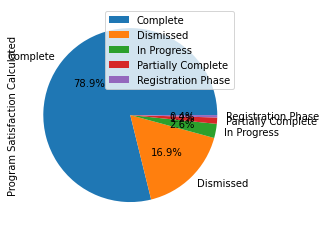

In [17]:
data.plot.pie(autopct="%.1f%%", subplots=True) #pie chart for those engagements that have a 10 

In [50]:
cta=committedtakingaction.groupby('Goal Record ID').agg({'Program Satisfaction Calculated': ['mean'],'Weekly Coaching Engagement Unique ID': 'count'}).reset_index()

In [51]:
cta.head()

,Goal Record ID,Program Satisfaction Calculated,Weekly Coaching Engagement Unique ID
,,mean,count
0,20200706-1915866,4.0,1
1,20200706-1916160,5.0,1
2,20200713-1919459,5.0,1
3,20200719-1922687,5.0,2
4,20200731-1930242,5.0,1


In [52]:
cta['Weekly Coaching Engagement Unique ID'].describe() 

,count
count,702.000000
mean,1.611111
std,1.039061
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,7.000000


In [18]:
somewhatcomitted = engagements[(engagements['Stage_of_change'].str.contains('5'))]

In [19]:
somewhatcomitted.head()

,Goal Record ID,Weekly Coaching Engagement Unique ID,Overall Goal Status,Date of Engagement,Engagement Type,Discontinued Coaching,Program Satisfaction Calculated,Stage_of_change
3,20201104-1990369,E-20210104-5435042,Complete,1/4/21,1:1 Telephonic,NaN,5.0,"5- Somewhat committed, has action steps that t..."
4,20201228-2005493,E-20210104-5435045,Complete,1/4/21,1:1 Telephonic,NaN,5.0,"5- Somewhat committed, has action steps that t..."
11,20210102-2006528,E-20210104-5435134,Dismissed,1/4/21,1:1 Telephonic,Coaching Needs Met,5.0,"5- Somewhat committed, has action steps that t..."
16,20201231-2006092,E-20210104-5435235,Complete,1/4/21,1:1 Telephonic,NaN,4.0,"5- Somewhat committed, has action steps that t..."
22,20200817-1939904,E-20210104-5435271,Complete,1/4/21,1:1 Telephonic,NaN,NaN,"5- Somewhat committed, has action steps that t..."


In [20]:
somewhatcomitted['Overall Goal Status'].value_counts()

Complete              2127
Dismissed             1884
In Progress            251
Partially Complete     231
Registration Phase       6
No Action                4
Name: Overall Goal Status, dtype: int64

In [21]:
somewhatcomitted['Program Satisfaction Calculated'].describe()

count    3436.000000
mean        4.635623
std         0.566868
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: Program Satisfaction Calculated, dtype: float64

In [22]:
data3= somewhatcomitted.groupby('Overall Goal Status').sum()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff36ba497c0>],
      dtype=object)

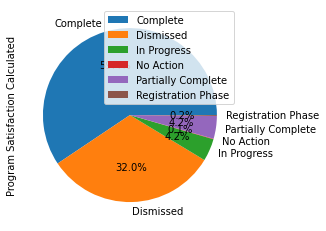

In [23]:
data3.plot.pie(autopct="%.1f%%", subplots=True) #pie chart for those engagements that have a 5

In [24]:
committed = engagements[(engagements['Stage_of_change'].str.contains('7'))]
committed.head(20)

,Goal Record ID,Weekly Coaching Engagement Unique ID,Overall Goal Status,Date of Engagement,Engagement Type,Discontinued Coaching,Program Satisfaction Calculated,Stage_of_change
6,20201218-2004706,E-20210104-5435193,Complete,1/4/21,1:1 Telephonic,NaN,5.0,7- Committed and taking action
13,20210104-2007514,E-20210104-5435198,Dismissed,1/4/21,1:1 Telephonic,NaN,NaN,7- Committed and taking action
17,20210104-2007703,E-20210104-5435262,Dismissed,1/4/21,1:1 Telephonic,Not with Company,NaN,7- Committed and taking action
18,20201210-2003171,E-20210104-5435264,Complete,1/4/21,1:1 Telephonic,NaN,5.0,7- Committed and taking action
19,20201023-1984497,E-20210104-5435266,Complete,1/4/21,1:1 Telephonic,NaN,5.0,7- Committed and taking action
21,20201113-1994116,E-20210104-5435270,Complete,1/4/21,1:1 Telephonic,NaN,5.0,7- Committed and taking action
29,20201111-1993382,E-20210104-5435389,Dismissed,1/4/21,1:1 Telephonic,NaN,NaN,7- Committed and taking action
34,20201130-1999623,E-20210104-5435428,Dismissed,1/4/21,1:1 Telephonic,NaN,NaN,7- Committed and taking action
39,20201203-2001140,E-20210104-5435489,Dismissed,1/4/21,1:1 Telephonic,NaN,5.0,7- Committed and taking action
40,20201221-2005054,E-20210104-5435493,Dismissed,1/4/21,1:1 Telephonic,NaN,NaN,7- Committed and taking action


In [25]:
committed['Overall Goal Status'].value_counts()

Complete              3878
Dismissed             2605
In Progress            358
Partially Complete     354
Registration Phase       7
No Action                1
Name: Overall Goal Status, dtype: int64

In [26]:
committed['Program Satisfaction Calculated'].describe()

count    5145.000000
mean        4.721672
std         0.486887
min         2.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: Program Satisfaction Calculated, dtype: float64

In [27]:
data2= committed.groupby('Overall Goal Status').sum()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff36accc1c0>],
      dtype=object)

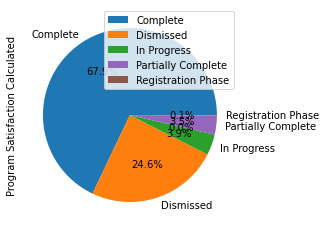

In [28]:
data2.plot.pie(autopct="%.1f%%", subplots=True) #pie chart for those engagements with a 7

In [29]:
thinking = engagements[(engagements['Stage_of_change'].str.contains('3'))]
thinking.head(20)

,Goal Record ID,Weekly Coaching Engagement Unique ID,Overall Goal Status,Date of Engagement,Engagement Type,Discontinued Coaching,Program Satisfaction Calculated,Stage_of_change
5,20201002-1970912,E-20210104-5435048,Dismissed,1/4/21,1:1 Telephonic,NaN,NaN,"3- Thinking about committing, sees some value ..."
37,20201229-2005809,E-20210104-5435485,Dismissed,1/4/21,1:1 Telephonic,NaN,5.0,"3- Thinking about committing, sees some value ..."
53,20210102-2006478,E-20210104-5435681,Dismissed,1/4/21,1:1 Telephonic,Unresponsive,NaN,"3- Thinking about committing, sees some value ..."
58,20200827-1945853,E-20210104-5435741,Complete,1/4/21,1:1 Telephonic,NaN,NaN,"3- Thinking about committing, sees some value ..."
114,20210102-2006536,E-20210105-5436576,Dismissed,1/5/21,1:1 Telephonic,Coaching Needs Met,5.0,"3- Thinking about committing, sees some value ..."
116,20210104-2006712,E-20210105-5436609,Dismissed,1/5/21,1:1 Telephonic,Unresponsive,5.0,"3- Thinking about committing, sees some value ..."
139,20210104-2008203,E-20210105-5436704,Complete,1/5/21,1:1 Telephonic,NaN,5.0,"3- Thinking about committing, sees some value ..."
141,20201231-2006249,E-20210105-5436706,Complete,1/5/21,1:1 Telephonic,NaN,4.0,"3- Thinking about committing, sees some value ..."
155,20201028-1987395,E-20210106-5437028,Dismissed,1/6/21,1:1 Telephonic,NaN,4.0,"3- Thinking about committing, sees some value ..."
184,20210104-2008298,E-20210106-5437264,Dismissed,1/6/21,1:1 Telephonic,Unresponsive,NaN,"3- Thinking about committing, sees some value ..."


In [30]:
thinking['Overall Goal Status'].value_counts()

Dismissed             555
Complete              448
Partially Complete     45
In Progress            43
No Action               3
Registration Phase      1
Name: Overall Goal Status, dtype: int64

In [31]:
data4= thinking.groupby('Overall Goal Status').sum()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff36ad7c790>],
      dtype=object)

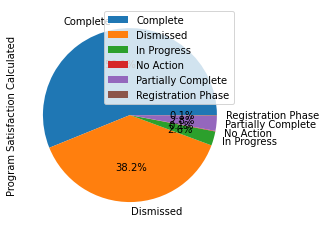

In [32]:
data4.plot.pie(autopct="%.1f%%", subplots=True) #pie chart for those engagements with a 3

In [33]:
thinking['Program Satisfaction Calculated'].describe()

count    787.000000
mean       4.579416
std        0.602989
min        2.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: Program Satisfaction Calculated, dtype: float64

In [34]:
notcommitted = engagements[(engagements['Stage_of_change'].str.contains('Not committed'))]
notcommitted.head(20)

,Goal Record ID,Weekly Coaching Engagement Unique ID,Overall Goal Status,Date of Engagement,Engagement Type,Discontinued Coaching,Program Satisfaction Calculated,Stage_of_change
69,20210103-2006587,E-20210104-5435905,Complete,1/4/21,Follow-Up/Program Check-in,Prefers Webinars,NaN,"0- Not committed at all, does not plan on maki..."
179,20201130-1999845,E-20210106-5437232,Dismissed,1/6/21,1:1 Telephonic,NaN,3.0,"0- Not committed at all, does not plan on maki..."
380,20210105-2009639,E-20210111-5437557,Dismissed,1/11/21,1:1 Telephonic,Not Interested,NaN,"0- Not committed at all, does not plan on maki..."
854,20210119-2025841,E-20210120-5459177,Dismissed,1/20/21,1:1 Telephonic,NaN,NaN,"0- Not committed at all, does not plan on maki..."
870,20210109-2014587,E-20210120-5459710,Dismissed,1/20/21,Follow-Up/Program Check-in,NaN,NaN,"0- Not committed at all, does not plan on maki..."
1087,20210123-2028965,E-20210125-5469738,Dismissed,1/25/21,1:1 Telephonic,Not Interested,NaN,"0- Not committed at all, does not plan on maki..."
1140,20210114-2019990,E-20210125-5471541,Dismissed,1/25/21,1:1 Telephonic,Not Interested,NaN,"0- Not committed at all, does not plan on maki..."
1485,20210127-2033324,E-20210129-5488877,Dismissed,1/29/21,1:1 Telephonic,Not Interested,NaN,"0- Not committed at all, does not plan on maki..."
1498,20210118-2024429,E-20210129-5489086,Dismissed,1/29/21,Follow-Up/Program Check-in,Not Interested,NaN,"0- Not committed at all, does not plan on maki..."
1509,20210125-2030740,E-20210130-5489300,Complete,1/29/21,Missed Appointment/ Left VM,NaN,NaN,"0- Not committed at all, does not plan on maki..."


In [35]:
notcommitted['Overall Goal Status'].value_counts()

Dismissed             101
Complete               29
Partially Complete     13
No Action               1
In Progress             1
Name: Overall Goal Status, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff36ae9c550>],
      dtype=object)

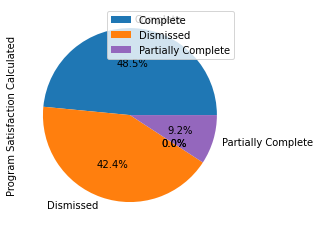

In [36]:
data5= notcommitted.groupby('Overall Goal Status').sum()
data5.plot.pie(autopct="%.1f%%", subplots=True) #pie chart for those engagements with a 0

In [37]:
notcommitted['Program Satisfaction Calculated'].describe()

count    57.000000
mean      4.017544
std       0.876096
min       2.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: Program Satisfaction Calculated, dtype: float64

In [38]:
Discontinued = engagements[engagements['Discontinued Coaching'].notna()]

In [39]:
Discontinued.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1597 entries, 11 to 19544
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Goal Record ID                        1597 non-null   object 
 1   Weekly Coaching Engagement Unique ID  1597 non-null   object 
 2   Overall Goal Status                   1597 non-null   object 
 3   Date of Engagement                    1597 non-null   object 
 4   Engagement Type                       1597 non-null   object 
 5   Discontinued Coaching                 1597 non-null   object 
 6   Program Satisfaction Calculated       669 non-null    float64
 7   Stage_of_change                       1597 non-null   object 
dtypes: float64(1), object(7)
memory usage: 112.3+ KB


In [40]:
Discontinued['Overall Goal Status'].value_counts()

Dismissed             1420
Complete               126
Partially Complete      28
In Progress             18
No Action                5
Name: Overall Goal Status, dtype: int64

In [41]:
Discontinued['Stage_of_change'].value_counts()

7- Committed and taking action                                                                   471
5- Somewhat committed, has action steps that they are ready to take                              436
Missed/Rescheduled                                                                               361
3- Thinking about committing, sees some value in making some changes                             154
10- Committed +, understands action steps and has already completed said actions for sometime     96
0- Not committed at all, does not plan on making a commitment                                     79
Name: Stage_of_change, dtype: int64

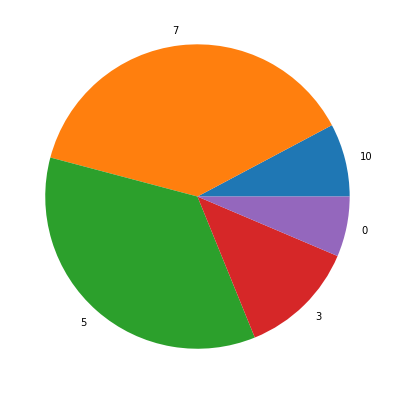

In [42]:
stages = ['10', '7', '5',
        '3', '0']
 
data = [96, 471, 436, 154, 79]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = stages)
 
# show plot
plt.show()

#showing stages of change for those engagements with the discont. coaching field filled in 

In [45]:
dis = Discontinued.groupby('Goal Record ID').agg({'Program Satisfaction Calculated': ['mean'],'Weekly Coaching Engagement Unique ID': 'count'}).reset_index()

In [43]:
dis = engagements[engagements['Stage_of_change'].notna()]

In [46]:
dis.head()

,Goal Record ID,Program Satisfaction Calculated,Weekly Coaching Engagement Unique ID
,,mean,count
0,20200214-1790234,4.5,6
1,20200719-1922687,5.0,4
2,20200806-1933723,5.0,1
3,20200812-1937192,NaN,1
4,20200828-1946409,NaN,2


In [47]:
dis['Weekly Coaching Engagement Unique ID'].describe() 

,count
count,760.000000
mean,2.101316
std,1.558351
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,9.000000


Recap for Sat. and Overall Goal Status: 

For the Stages of Changes the Program satisfaction ranges between 4.01 to 4.8. The satisfaction and stage of change had a positive correlation, increasing as the stage of change increased. 

'Complete' was the highest overall goal status for each stage of change, but as the stage of change decreased, the 'dismissed' goals increased. Dismissed ranged from 42.4% to 16.9%.

Discontinued Coaching to date: 
The stage of changed that had most Discontinued Coaching selected is 7 and 5, which is a total of 66% of the dis. goals
